In [7]:
import os
os.chdir(os.path.join(os.getcwd(),'..'))

In [8]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
import random
from collections import OrderedDict
from time import time

import numpy as np
import pandas as pd
from cameo import models
from retrying import retry

from analysis import BaseFVA

In [10]:
bigg_models = models.bigg

In [11]:
models = OrderedDict({
    'e_coli_core': BaseFVA.create_for(bigg_models.e_coli_core),
    'iAB_RBC_283': BaseFVA.create_for(bigg_models.iAB_RBC_283),
    'iRC1080': BaseFVA.create_for(bigg_models.iRC1080),
    'RECON1': BaseFVA.create_for(bigg_models.RECON1),
    'RECON2': BaseFVA.create_for()
})

In [6]:
@retry
def sample_analysis_time(model, size):
    input_data = { m.id: random.uniform(-10, 10) for m in random.sample(model.metabolites, size)}
    t = time()
    model.analyze(input_data)
    return time() - t

In [ ]:
from IPython.display import clear_output

In [ ]:
measurements = dict()

for name, model in models.items():
    measurements[name] = list()
    for s in range(5, 150, 5):
        times = list()
        for _ in range(10):
            if len(model.metabolites) >= s:
                times.append(sample_analysis_time(model.copy(), s))
        measurements[name].append(np.mean(times))
        clear_output()
        print(measurements)

{'RECON1': [418.72530460357666, 412.527259349823, 422.71280956268311]}


In [83]:
measurements = {
    "e_coli_core": [0.075, 0.082, 0.128, 0.188, 0.175, 0.227, 0.278, 0.495, 0.559, 0.607, 0.698,
                    np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 
                    np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    "iAB_RBC_283": [0.506, 0.530, 0.530, 0.533, 1.028, 0.863, 0.861, 1.598, 1.628, 2.048, 1.386,
                    1.707, 1.210, 1.874, 2.112, 3.170, 2.870, 2.912, 2.656, 3.289, 3.635, 2.833, 2.853,
                    3.302, 4.680, 4.514, 5.611, 4.756, 5.561],
    'iRC1080':     [10.012, 10.067, 10.893, 9.747, 9.617, 9.963, 10.372, 11.583, 9.795, 11.431, 10.291, 
                    11.231, 12.227, 10.349, 12.022, 14.185, 17.425, 14.034, 13.049, 13.026, 17.398,
                    15.912, 12.017, 12.917, 12.634, 21.068, 15.133, 28.324, 19.740],
    'RECON1':      [58.294, 57.129, 55.612, 54.988, 78.384, 55.434, 60.269, 47.300, 74.282, 42.214, 
                    43.603, 58.409, 60.920, 52.988, 82.647, 43.520, 61.269, 56.824, 54.734, 53.758, 
                    36.773, 39.926, 42.510, 46.061, 45.714, 56.578, 56.121, 48.229],
    'RECON2':      [249, 250, 246.400, 254, 241, 212, 223, 233, 213, 187, 202, 196, 176, 172, 175, 160] + [np.nan] * 13
}

In [84]:
len(measurements['RECON2'])

29

In [86]:
df = pd.DataFrame.from_dict(measurements, orient='index').transpose()

df.index = list(range(5, 150, 5))

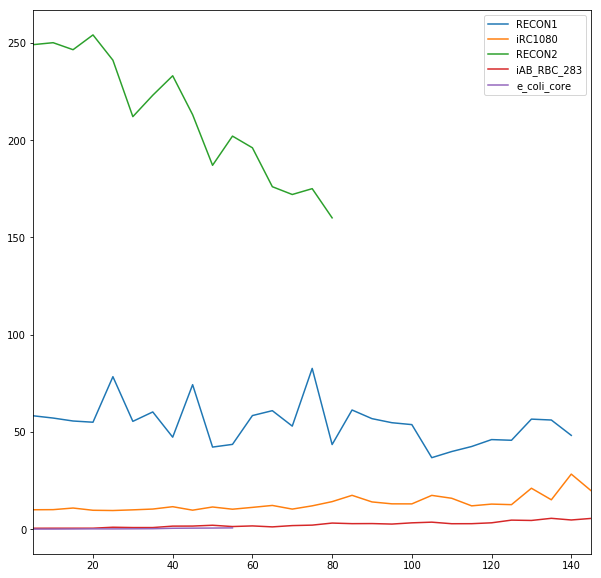

In [87]:
df.plot(figsize=(10, 10)) 

In [ ]:
df